## Assignment 3

Load the Dataset

In [18]:
ls


sample_data/


In [5]:
cd /content/drive/MyDrive/Colab Notebooks/CNN1

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/CNN1'
/content


In [7]:
ls

sample_data/


In [19]:
pwd

'/content'

In [8]:
!unzip Flowers-Dataset.zip

unzip:  cannot find or open Flowers-Dataset.zip, Flowers-Dataset.zip.zip or Flowers-Dataset.zip.ZIP.


Image Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [11]:
test_data = ImageDataGenerator(rescale= 1./255)

In [20]:
x_train = train_data.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/CNN1/flowers",target_size = (64,64),class_mode = "categorical",batch_size = 40)

FileNotFoundError: ignored

In [17]:
x_test = test_data.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/CNN1/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 40)

FileNotFoundError: ignored

Creating CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

Adding Layers

In [ ]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(5, activation="softmax"))

Compile the Model

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

In [ ]:
len(x_train)

108

Fit the Model

In [ ]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
108/108 [==============================] - 62s 578ms/step - loss: 1.0442 - accuracy: 0.5789 - val_loss: 1.0239 - val_accuracy: 0.5967
Epoch 2/5
108/108 [==============================] - 60s 560ms/step - loss: 0.9752 - accuracy: 0.6101 - val_loss: 0.9477 - val_accuracy: 0.6319
Epoch 3/5
108/108 [==============================] - 61s 569ms/step - loss: 0.9167 - accuracy: 0.6456 - val_loss: 0.8871 - val_accuracy: 0.6613
Epoch 4/5
108/108 [==============================] - 61s 565ms/step - loss: 0.8663 - accuracy: 0.6704 - val_loss: 0.8931 - val_accuracy: 0.6595
Epoch 5/5
108/108 [==============================] - 62s 577ms/step - loss: 0.8402 - accuracy: 0.6706 - val_loss: 0.9205 - val_accuracy: 0.6335


Save the Model

In [ ]:
model.save("flower.h5")

Test the Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
 model = load_model("/content/drive/MyDrive/Colab Notebooks/CNN1/flower.h5")

In [ ]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/CNN1/flowers/rose/10090824183_d02c613f10_m.jpg",target_size=(64,64))

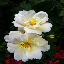

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[14., 22.,  7.],
        [11., 22.,  6.],
        [ 8., 19.,  3.],
        ...,
        [32., 47., 24.],
        [30., 48., 22.],
        [33., 49., 23.]],

       [[13., 20., 12.],
        [11., 21., 10.],
        [11., 22.,  8.],
        ...,
        [37., 51., 26.],
        [35., 49., 26.],
        [25., 45., 20.]],

       [[19., 30., 16.],
        [19., 31., 17.],
        [16., 29., 12.],
        ...,
        [31., 47., 20.],
        [28., 49., 18.],
        [27., 43., 17.]],

       ...,

       [[15., 17.,  6.],
        [ 2.,  9.,  2.],
        [ 2.,  9.,  1.],
        ...,
        [ 8., 21., 11.],
        [ 2., 12.,  3.],
        [ 9., 16.,  9.]],

       [[12., 20.,  9.],
        [ 1.,  8.,  1.],
        [ 5., 10.,  3.],
        ...,
        [ 3.,  8.,  2.],
        [ 6., 16.,  5.],
        [ 5.,  7.,  4.]],

       [[24., 27., 18.],
        [11., 21., 13.],
        [ 8., 13.,  6.],
        ...,
        [ 1.,  6.,  0.],
        [ 2.,  9.,  1.],
        [ 2.,  9.,  1.]]

In [ ]:
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
x.ndim

4

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels=["Daisy","Dandalion","Rose","Sunflower","Tulip"]

In [ ]:
np.argmax(pred)

0

In [ ]:
labels[np.argmax(pred)]

'Daisy'